In [ ]:
!pip install ipython-autotime

%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.9 MB/s eta 0:00:00
time: 396 µs (started: 2024-03-03 20:29:00 +00:00)


In [ ]:
from google.colab import files


uploaded = files.upload()

Saving file(3).csv to file(3) (3).csv
time: 41.2 s (started: 2024-03-03 20:29:00 +00:00)


In [ ]:
%%time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

CPU times: user 52 µs, sys: 0 ns, total: 52 µs
Wall time: 57.7 µs
time: 3.2 ms (started: 2024-03-03 20:29:41 +00:00)


In [ ]:
%%time

data = pd.read_csv('file(3).csv',header='infer')
data.head()
data.shape

CPU times: user 52.5 ms, sys: 8.02 ms, total: 60.5 ms
Wall time: 60.1 ms


(10302, 25)

time: 66.7 ms (started: 2024-03-03 20:29:41 +00:00)


CPU times: user 98.9 ms, sys: 20.1 ms, total: 119 ms
Wall time: 102 ms


<timed exec>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

<timed exec>:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14


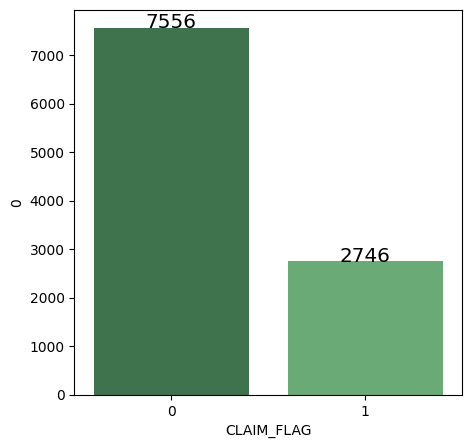

time: 266 ms (started: 2024-03-03 20:29:41 +00:00)


In [ ]:
%%time

#Calculating count of Fraud vs No Fraud cases
plt.figure(figsize=(5,5))
target_group = data.groupby('CLAIM_FLAG').size().reset_index()
pal = sns.color_palette("Greens_d", len(target_group))
rank = target_group["CLAIM_FLAG"].argsort().argsort()
g = sns.barplot(x = target_group['CLAIM_FLAG'],y = target_group[0],palette=np.array(pal[::-1])[rank] )

for index, row in target_group.iterrows():
    g.text(row['CLAIM_FLAG'],row[0], round(row[0],2), color='black', ha="center",fontsize='x-large')

As we can see, there is an imbalance in data

In [ ]:
%%time

data.head

CPU times: user 9 µs, sys: 1e+03 ns, total: 10 µs
Wall time: 12.6 µs


<bound method NDFrame.head of               ID  KIDSDRIV   AGE  HOMEKIDS   YOJ    INCOME PARENT1  HOME_VAL  \
0       63581743         0  60.0         0  11.0   $67,349      No        $0   
1      132761049         0  43.0         0  11.0   $91,449      No  $257,252   
2      921317019         0  48.0         0  11.0   $52,881      No        $0   
3      727598473         0  35.0         1  10.0   $16,039      No  $124,191   
4      450221861         0  51.0         0  14.0       NaN      No  $306,251   
...          ...       ...   ...       ...   ...       ...     ...       ...   
10297   67790126         1  45.0         2   9.0  $164,669      No  $386,273   
10298   61970712         0  46.0         0   9.0  $107,204      No  $332,591   
10299  849208064         0  48.0         0  15.0   $39,837      No  $170,611   
10300  627828331         0  50.0         0   7.0   $43,445      No  $149,248   
10301  680381960         0  52.0         0  11.0   $53,235      No  $197,017   

      MSTATUS GENDER  ... TIF     CAR_TYPE  RED_CAR OLDCLAIM CLM_FREQ  \
0        z_No      M  ...  11      Minivan      yes   $4,461        2   
1        z_No      M  ...   1      Minivan      yes       $0        0   
2        z_No      M  ...   1          Van      yes       $0        0   
3         Yes    z_F  ...   4        z_SUV       no  $38,690        2   
4         Yes      M  ...   7      Minivan      yes       $0        0   
...       ...    ...  ...  ..          ...      ...      ...      ...   
10297     Yes      M  ...  15      Minivan       no       $0        0   
10298     Yes      M  ...   6  Panel Truck       no       $0        0   
10299     Yes    z_F  ...   7        z_SUV       no       $0        0   
10300     Yes    z_F  ...   6      Minivan       no       $0        0   
10301     Yes    z_F  ...   6      Minivan       no       $0        0   

       REVOKED MVR_PTS CLM_AMT CAR_AGE  CLAIM_FLAG  
0           No       3      $0    18.0           0  
1           No       0      $0     1.0           0  
2           No       2      $0    10.0           0  
3           No       3      $0    10.0           0  
4           No       0      $0     6.0           0  
...        ...     ...     ...     ...         ...  
10297       No       2      $0    17.0           0  
10298       No       0      $0     1.0           0  
10299       No       0      $0     1.0           0  
10300       No       0      $0    11.0           0  
10301       No       0      $0     9.0           0  

[10302 rows x 25 columns]>

time: 34.8 ms (started: 2024-03-03 20:29:41 +00:00)


In [ ]:
%%time

columns_to_drop = ['KIDSDRIV', 'HOMEKIDS', 'YOJ','PARENT1','HOME_VAL','MSTATUS','TRAVTIME','EDUCATION','BLUEBOOK','RED_CAR']
data = data.drop(columns_to_drop,axis=1)
data.head()

CPU times: user 2.71 ms, sys: 0 ns, total: 2.71 ms
Wall time: 2.73 ms


,ID,AGE,INCOME,GENDER,OCCUPATION,CAR_USE,TIF,CAR_TYPE,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,63581743,60.0,"$67,349",M,Professional,Private,11,Minivan,"$4,461",2,No,3,$0,18.0,0
1,132761049,43.0,"$91,449",M,z_Blue Collar,Commercial,1,Minivan,$0,0,No,0,$0,1.0,0
2,921317019,48.0,"$52,881",M,Manager,Private,1,Van,$0,0,No,2,$0,10.0,0
3,727598473,35.0,"$16,039",z_F,Clerical,Private,4,z_SUV,"$38,690",2,No,3,$0,10.0,0
4,450221861,51.0,NaN,M,z_Blue Collar,Private,7,Minivan,$0,0,No,0,$0,6.0,0


time: 57.1 ms (started: 2024-03-03 20:29:41 +00:00)


In [ ]:
%%time

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of missing values:
	ID: 0
	AGE: 7
	INCOME: 570
	GENDER: 0
	OCCUPATION: 665
	CAR_USE: 0
	TIF: 0
	CAR_TYPE: 0
	OLDCLAIM: 0
	CLM_FREQ: 0
	REVOKED: 0
	MVR_PTS: 0
	CLM_AMT: 0
	CAR_AGE: 639
	CLAIM_FLAG: 0
CPU times: user 19 ms, sys: 2.01 ms, total: 21 ms
Wall time: 20.5 ms
time: 23.6 ms (started: 2024-03-03 20:29:41 +00:00)


In [ ]:
%%time

data['INCOME'].dtype

CPU times: user 86 µs, sys: 0 ns, total: 86 µs
Wall time: 92 µs


dtype('O')

time: 8.1 ms (started: 2024-03-03 20:29:42 +00:00)


In [ ]:
%%time

data['INCOME'].unique()
data['INCOME'] = data['INCOME'].str.replace('$', '')
data['INCOME'] = data['INCOME'].str.replace(',', '')
data['INCOME'] = pd.to_numeric(data['INCOME'])
data2 = data['INCOME']
data2 = data2.fillna(data2.median())

data['INCOME'] = data2

CPU times: user 26.3 ms, sys: 873 µs, total: 27.2 ms
Wall time: 26.9 ms
time: 28.8 ms (started: 2024-03-03 20:29:42 +00:00)


<timed exec>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [ ]:
data['CAR_AGE'] = pd.to_numeric(data['CAR_AGE'])
data2 = data['CAR_AGE']
data2 = data2.fillna(data2.median())

data['CAR_AGE'] = data2

time: 3.98 ms (started: 2024-03-03 20:29:42 +00:00)


In [ ]:

data2 = data['OCCUPATION']
data2 = data2.fillna(data2.mode())

data['OCCUPATION'] = data2

time: 6.37 ms (started: 2024-03-03 20:29:42 +00:00)


In [ ]:
data2 = data['AGE']
data2 = data2.fillna(data2.median())

data['AGE'] = data2

time: 2.63 ms (started: 2024-03-03 20:29:42 +00:00)


In [ ]:
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of missing values:
	ID: 0
	AGE: 0
	INCOME: 0
	GENDER: 0
	OCCUPATION: 665
	CAR_USE: 0
	TIF: 0
	CAR_TYPE: 0
	OLDCLAIM: 0
	CLM_FREQ: 0
	REVOKED: 0
	MVR_PTS: 0
	CLM_AMT: 0
	CAR_AGE: 0
	CLAIM_FLAG: 0
time: 22 ms (started: 2024-03-03 20:29:42 +00:00)


In [ ]:
data.dropna(inplace=True)

time: 18.1 ms (started: 2024-03-03 20:29:42 +00:00)


In [ ]:
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of missing values:
	ID: 0
	AGE: 0
	INCOME: 0
	GENDER: 0
	OCCUPATION: 0
	CAR_USE: 0
	TIF: 0
	CAR_TYPE: 0
	OLDCLAIM: 0
	CLM_FREQ: 0
	REVOKED: 0
	MVR_PTS: 0
	CLM_AMT: 0
	CAR_AGE: 0
	CLAIM_FLAG: 0
time: 20.5 ms (started: 2024-03-03 20:29:42 +00:00)


In [ ]:
data.head()

,ID,AGE,INCOME,GENDER,OCCUPATION,CAR_USE,TIF,CAR_TYPE,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,63581743,60.0,67349.0,M,Professional,Private,11,Minivan,"$4,461",2,No,3,$0,18.0,0
1,132761049,43.0,91449.0,M,z_Blue Collar,Commercial,1,Minivan,$0,0,No,0,$0,1.0,0
2,921317019,48.0,52881.0,M,Manager,Private,1,Van,$0,0,No,2,$0,10.0,0
3,727598473,35.0,16039.0,z_F,Clerical,Private,4,z_SUV,"$38,690",2,No,3,$0,10.0,0
4,450221861,51.0,53529.0,M,z_Blue Collar,Private,7,Minivan,$0,0,No,0,$0,6.0,0


time: 68.2 ms (started: 2024-03-03 20:29:42 +00:00)


In [ ]:

drop_cols = ['CLM_AMT', 'MVR_PTS', 'OLDCLAIM', 'TIF']
data = data.drop(drop_cols, axis = 1)


time: 3.84 ms (started: 2024-03-03 20:29:42 +00:00)


In [ ]:
'''
data['OLDCLAIM'].unique()
data['OLDCLAIM'] = data['OLDCLAIM'].str.replace('$', '')
data['OLDCLAIM'] = data['OLDCLAIM'].str.replace(',', '')
data['OLDCLAIM'] = pd.to_numeric(data['OLDCLAIM'])
'''
data['CLM_FREQ'] = pd.to_numeric(data['CLM_FREQ'])



time: 1.73 ms (started: 2024-03-03 20:29:42 +00:00)


In [ ]:
'''
data['CLM_AMT'].unique()
data['CLM_AMT'] = data['CLM_AMT'].str.replace('$', '')
data['CLM_AMT'] = data['CLM_AMT'].str.replace(',', '')
data['CLM_AMT'] = pd.to_numeric(data['CLM_AMT'])
'''

"\ndata['CLM_AMT'].unique()\ndata['CLM_AMT'] = data['CLM_AMT'].str.replace('$', '')\ndata['CLM_AMT'] = data['CLM_AMT'].str.replace(',', '')\ndata['CLM_AMT'] = pd.to_numeric(data['CLM_AMT'])\n"

time: 2.95 ms (started: 2024-03-03 20:29:42 +00:00)


In [ ]:
data['GENDER'] = data['GENDER'].replace('z_F','F')
data['OCCUPATION'] = data['OCCUPATION'].replace('z_','')

time: 4.86 ms (started: 2024-03-03 20:29:42 +00:00)


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

time: 857 µs (started: 2024-03-03 20:29:42 +00:00)


In [ ]:
'''
scaler = StandardScaler()
data[['AGE', 'INCOME', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE']] = scaler.fit_transform(data[['AGE', 'INCOME', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE']])
'''

"\nscaler = StandardScaler()\ndata[['AGE', 'INCOME', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE']] = scaler.fit_transform(data[['AGE', 'INCOME', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE']])\n"

time: 3.1 ms (started: 2024-03-03 20:29:42 +00:00)


In [ ]:
numerical_cols = ['AGE', 'INCOME', 'CLM_FREQ', 'CAR_AGE']
categorical_cols = ['GENDER', 'CAR_USE', 'CAR_TYPE', 'REVOKED','OCCUPATION']


time: 714 µs (started: 2024-03-03 20:29:42 +00:00)


In [ ]:

# Perform one-hot encoding on categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Display the encoded DataFrame
print(data_encoded.head())

          ID   AGE   INCOME  CLM_FREQ  CAR_AGE  CLAIM_FLAG  GENDER_F  \
0   63581743  60.0  67349.0         2     18.0           0         0   
1  132761049  43.0  91449.0         0      1.0           0         0   
2  921317019  48.0  52881.0         0     10.0           0         0   
3  727598473  35.0  16039.0         2     10.0           0         1   
4  450221861  51.0  53529.0         0      6.0           0         0   

   GENDER_M  CAR_USE_Commercial  CAR_USE_Private  ...  REVOKED_No  \
0         1                   0                1  ...           1   
1         1                   1                0  ...           1   
2         1                   0                1  ...           1   
3         0                   0                1  ...           1   
4         1                   0                1  ...           1   

   REVOKED_Yes  OCCUPATION_Clerical  OCCUPATION_Doctor  OCCUPATION_Home Maker  \
0            0                    0                  0                 

In [ ]:
data_encoded.dtypes

ID                            int64
AGE                         float64
INCOME                      float64
CLM_FREQ                      int64
CAR_AGE                     float64
CLAIM_FLAG                    int64
GENDER_F                      uint8
GENDER_M                      uint8
CAR_USE_Commercial            uint8
CAR_USE_Private               uint8
CAR_TYPE_Minivan              uint8
CAR_TYPE_Panel Truck          uint8
CAR_TYPE_Pickup               uint8
CAR_TYPE_Sports Car           uint8
CAR_TYPE_Van                  uint8
CAR_TYPE_z_SUV                uint8
REVOKED_No                    uint8
REVOKED_Yes                   uint8
OCCUPATION_Clerical           uint8
OCCUPATION_Doctor             uint8
OCCUPATION_Home Maker         uint8
OCCUPATION_Lawyer             uint8
OCCUPATION_Manager            uint8
OCCUPATION_Professional       uint8
OCCUPATION_Student            uint8
OCCUPATION_z_Blue Collar      uint8
dtype: object

time: 11.5 ms (started: 2024-03-03 20:29:42 +00:00)


#**Using SMOTE Sampling Algorithm (RF, SVM, DNN)**

In [ ]:
'''
scaler = StandardScaler()
data_encoded[['AGE', 'INCOME', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE']] = scaler.fit_transform(data_encoded[['AGE', 'INCOME', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE']])
'''

X = data_encoded.drop(columns=['CLAIM_FLAG'], axis=1)
y = data_encoded['CLAIM_FLAG']
'''
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
#Standardizing/Normalizing features
'''
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_bal).value_counts())

# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_bal, y_train_bal)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf)

pd.DataFrame(precision_recall)

Class distribution after SMOTE:
0    5669
1    5669
Name: CLAIM_FLAG, dtype: int64
Accuracy: 0.7173236514522822


,0,1,accuracy,macro avg,weighted avg
precision,0.790841,0.486022,0.717324,0.638431,0.706731
recall,0.828797,0.424812,0.717324,0.626804,0.717324
f1-score,0.809374,0.453360,0.717324,0.631367,0.711138
support,1396.000000,532.000000,0.717324,1928.000000,1928.000000


time: 2.21 s (started: 2024-03-03 20:29:42 +00:00)


In [ ]:
import numpy as np

# Count the occurrences of each class in y_train_bal
class_counts = np.bincount(y_train_bal)

# Print the class distribution
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} samples")


Class 0: 5669 samples
Class 1: 5669 samples
time: 9.1 ms (started: 2024-03-03 20:29:44 +00:00)


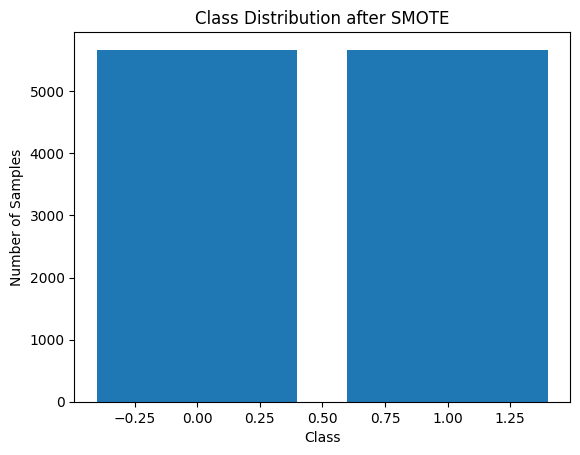

time: 395 ms (started: 2024-03-03 20:29:44 +00:00)


In [ ]:
import matplotlib.pyplot as plt

# Plot the class distribution
plt.bar(range(len(class_counts)), class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution after SMOTE')
plt.show()


In [ ]:
from sklearn.svm import LinearSVC

# Initialize the SVM classifier
svm_classifier = LinearSVC(random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_bal, y_train_bal)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm)
print("\nClassification Report:\n", report)

Accuracy: 0.6841286307053942

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.68      0.76      1396
           1       0.45      0.70      0.55       532

    accuracy                           0.68      1928
   macro avg       0.66      0.69      0.65      1928
weighted avg       0.75      0.68      0.70      1928

time: 3.92 s (started: 2024-03-03 20:29:45 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#Splitting data into: features (X) and target (y)
X = data_encoded.drop(columns=['CLAIM_FLAG'], axis=1)
y = data_encoded['CLAIM_FLAG']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

smoteAlg = SMOTE(random_state=42)
X_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = smoteAlg.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(25,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/10
241/241 [==============================] - 3s 6ms/step - loss: 0.5384 - accuracy: 0.7394 - val_loss: 0.6421 - val_accuracy: 0.6250
Epoch 2/10
241/241 [==============================] - 1s 4ms/step - loss: 0.5117 - accuracy: 0.7583 - val_loss: 0.6560 - val_accuracy: 0.6129
Epoch 3/10
241/241 [==============================] - 2s 7ms/step - loss: 0.5041 - accuracy: 0.7604 - val_loss: 0.6642 - val_accuracy: 0.6136
Epoch 4/10
241/241 [==============================] - 1s 5ms/step - loss: 0.4980 - accuracy: 0.7643 - val_loss: 0.6657 - val_accuracy: 0.6286
Epoch 5/10
241/241 [==============================] - 1s 6ms/step - loss: 0.4960 - accuracy: 0.7657 - val_loss: 0.6352 - val_accuracy: 0.6393
Epoch 6/10
241/241 [==============================] - 1s 5ms/step - loss: 0.4927 - accuracy: 0.7638 - val_loss: 0.6715 - val_accuracy: 0.6007
Epoch 7/10
241/241 [==============================] - 2s 8ms/step - loss: 0.4901 - accuracy: 0.7697 - val_loss: 0.6175 - val_accuracy: 0.6564
Epoch 

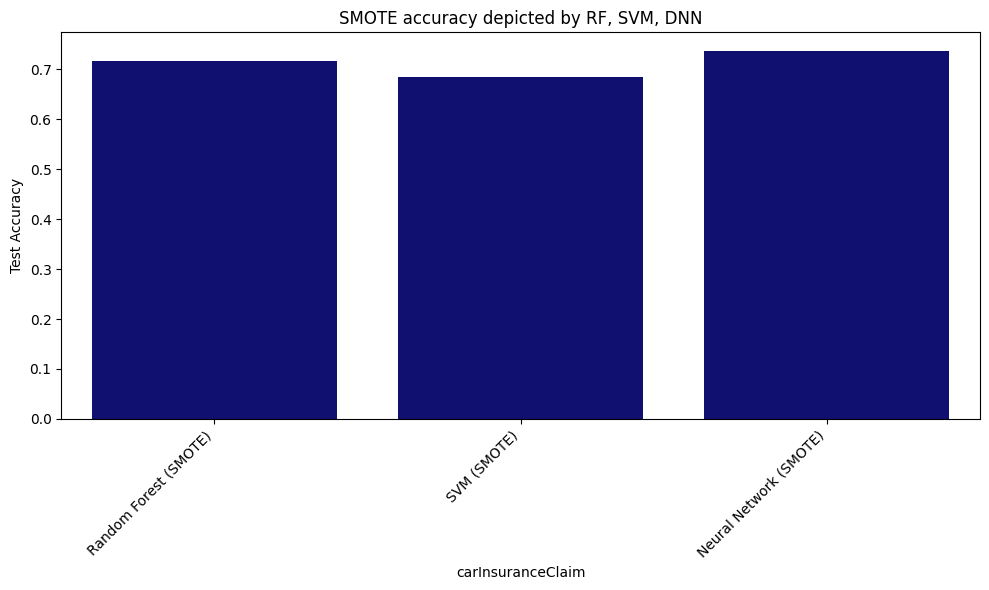

time: 890 ms (started: 2024-03-03 20:30:06 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (SMOTE)': accuracy_rf,
    'SVM (SMOTE)': accuracy_svm,
    'Neural Network (SMOTE)': accuracy_dnn,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='navy')
plt.xticks(rotation=45, ha='right')
plt.title('SMOTE accuracy depicted by RF, SVM, DNN')
plt.xlabel('carInsuranceClaim')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

As we can see, the accuracy from DNN with SMOTE sampling is 72%

#ADASYN SAMPLING ALGO (RF, SVM, DNN)

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the class distribution after applying ADASYN
print("Class distribution before ADASYN:")
print(pd.Series(y_train).value_counts())

# Apply ADASYN to balance the training set
adasyn = ADASYN(random_state=42, sampling_strategy=1.0)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Check the class distribution after applying ADASYN
print("Class distribution after ADASYN:")
print(pd.Series(y_train_resampled).value_counts())


Class distribution before ADASYN:
0    5669
1    2040
Name: CLAIM_FLAG, dtype: int64
Class distribution after ADASYN:
1    5908
0    5669
Name: CLAIM_FLAG, dtype: int64
time: 788 ms (started: 2024-03-03 20:30:07 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_adasyn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_adasyn)

pd.DataFrame(precision_recall)

Accuracy: 0.7053941908713693


,0,1,accuracy,macro avg,weighted avg
precision,0.788301,0.463415,0.705394,0.625858,0.698654
recall,0.810888,0.428571,0.705394,0.619730,0.705394
f1-score,0.799435,0.445312,0.705394,0.622374,0.701721
support,1396.000000,532.000000,0.705394,1928.000000,1928.000000


time: 3.92 s (started: 2024-03-03 20:30:08 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = LinearSVC(random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_adasyn = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_adasyn)
print("\nClassification Report:\n", report)

Accuracy: 0.6509336099585062

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.62      0.72      1396
           1       0.42      0.72      0.53       532

    accuracy                           0.65      1928
   macro avg       0.64      0.67      0.63      1928
weighted avg       0.74      0.65      0.67      1928

time: 5.61 s (started: 2024-03-03 20:30:12 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#Splitting data into: features (X) and target (y)
X = data_encoded.drop(columns=['CLAIM_FLAG'], axis=1)
y = data_encoded['CLAIM_FLAG']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply ADASYN to balance the training set
adasyn = ADASYN(random_state=42, sampling_strategy=1.0)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = adasyn.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(25,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_adasyn = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/10
241/241 [==============================] - 3s 8ms/step - loss: 0.5341 - accuracy: 0.7434 - val_loss: 0.6617 - val_accuracy: 0.6136
Epoch 2/10
241/241 [==============================] - 1s 2ms/step - loss: 0.5102 - accuracy: 0.7578 - val_loss: 0.7430 - val_accuracy: 0.5499
Epoch 3/10
241/241 [==============================] - 1s 2ms/step - loss: 0.5033 - accuracy: 0.7591 - val_loss: 0.7168 - val_accuracy: 0.5727
Epoch 4/10
241/241 [==============================] - 1s 2ms/step - loss: 0.4989 - accuracy: 0.7634 - val_loss: 0.7030 - val_accuracy: 0.5658
Epoch 5/10
241/241 [==============================] - 1s 2ms/step - loss: 0.4954 - accuracy: 0.7664 - val_loss: 0.6792 - val_accuracy: 0.6094
Epoch 6/10
241/241 [==============================] - 1s 2ms/step - loss: 0.4933 - accuracy: 0.7669 - val_loss: 0.6897 - val_accuracy: 0.5803
Epoch 7/10
241/241 [==============================] - 1s 2ms/step - loss: 0.4893 - accuracy: 0.7701 - val_loss: 0.6954 - val_accuracy: 0.5852
Epoch 

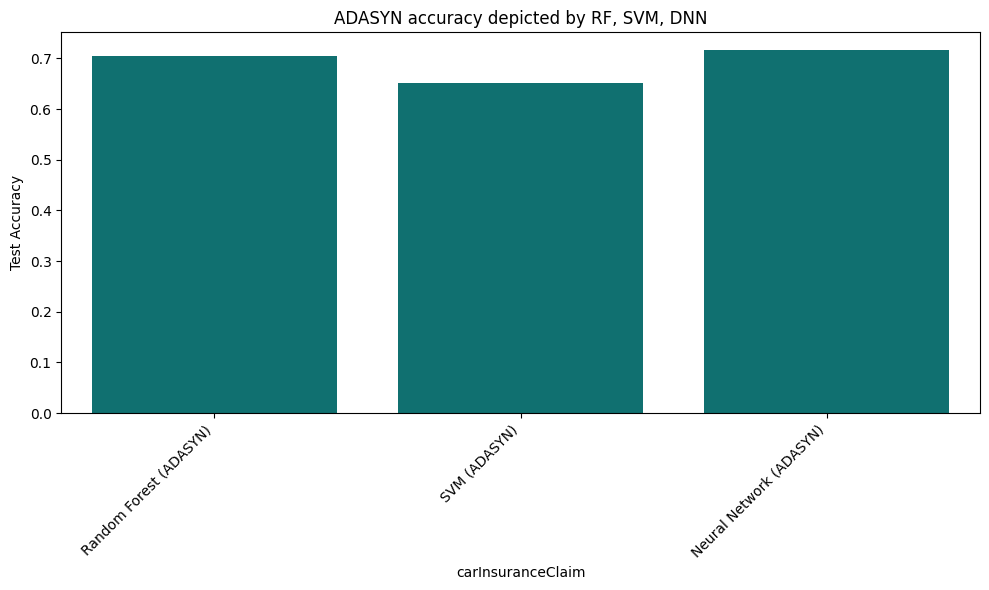

time: 310 ms (started: 2024-03-03 20:30:28 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (ADASYN)': accuracy_rf_adasyn,
    'SVM (ADASYN)': accuracy_svm_adasyn,
    'Neural Network (ADASYN)': accuracy_dnn_adasyn,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='teal')
plt.xticks(rotation=45, ha='right')
plt.title('ADASYN accuracy depicted by RF, SVM, DNN')
plt.xlabel('carInsuranceClaim')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

#RANDOM OVER SAMPLING ALGORITHM (RF, SVM, DNN)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after Random Oversampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Random Oversampling:
0    5669
1    5669
Name: CLAIM_FLAG, dtype: int64
time: 13.3 ms (started: 2024-03-03 20:30:28 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_rof = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_rof)

pd.DataFrame(precision_recall)

Accuracy: 0.7064315352697096


,0,1,accuracy,macro avg,weighted avg
precision,0.765766,0.459893,0.706432,0.612829,0.680731
recall,0.854885,0.320896,0.706432,0.587890,0.706432
f1-score,0.807875,0.378022,0.706432,0.592949,0.688372
support,696.000000,268.000000,0.706432,964.000000,964.000000


time: 1.56 s (started: 2024-03-03 20:30:28 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = LinearSVC(random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_rof = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_rof)
print("\nClassification Report:\n", report)

Accuracy: 0.6597510373443983

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.67      0.74       696
           1       0.43      0.64      0.51       268

    accuracy                           0.66       964
   macro avg       0.63      0.65      0.63       964
weighted avg       0.72      0.66      0.68       964

time: 2.03 s (started: 2024-03-03 20:30:30 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#Splitting data into: features (X) and target (y)
X = data_encoded.drop(columns=['CLAIM_FLAG'], axis=1)
y = data_encoded['CLAIM_FLAG']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply ros to balance the training set
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = ros.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(25,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_rof = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/10
241/241 [==============================] - 1s 3ms/step - loss: 0.5436 - accuracy: 0.7360 - val_loss: 0.6787 - val_accuracy: 0.6029
Epoch 2/10
241/241 [==============================] - 1s 2ms/step - loss: 0.5090 - accuracy: 0.7591 - val_loss: 0.6830 - val_accuracy: 0.6050
Epoch 3/10
241/241 [==============================] - 1s 2ms/step - loss: 0.5029 - accuracy: 0.7630 - val_loss: 0.6864 - val_accuracy: 0.6071
Epoch 4/10
241/241 [==============================] - 1s 2ms/step - loss: 0.4987 - accuracy: 0.7659 - val_loss: 0.6711 - val_accuracy: 0.5993
Epoch 5/10
241/241 [==============================] - 0s 2ms/step - loss: 0.4939 - accuracy: 0.7668 - val_loss: 0.6889 - val_accuracy: 0.5971
Epoch 6/10
241/241 [==============================] - 1s 2ms/step - loss: 0.4913 - accuracy: 0.7694 - val_loss: 0.6634 - val_accuracy: 0.6214
Epoch 7/10
241/241 [==============================] - 1s 2ms/step - loss: 0.4887 - accuracy: 0.7677 - val_loss: 0.6747 - val_accuracy: 0.6121
Epoch 

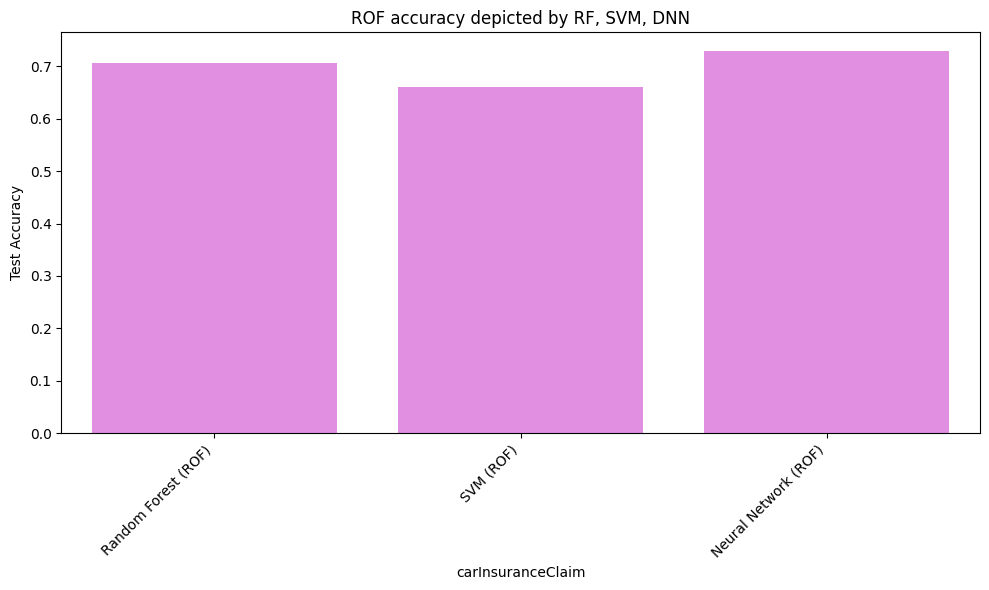

time: 484 ms (started: 2024-03-03 20:30:39 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (ROF)': accuracy_rf_rof,
    'SVM (ROF)': accuracy_svm_rof,
    'Neural Network (ROF)': accuracy_dnn_rof,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color = 'violet')
plt.xticks(rotation=45, ha='right')
plt.title('ROF accuracy depicted by RF, SVM, DNN')
plt.xlabel('carInsuranceClaim')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

#RANDOM UNDER SAMPLING ALGORITHM (RF, SVM, DNN)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after Random Oversampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Random Oversampling:
0    2040
1    2040
Name: CLAIM_FLAG, dtype: int64
time: 10.1 ms (started: 2024-03-03 20:30:39 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_ruf = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_ruf)

pd.DataFrame(precision_recall)

Accuracy: 0.6504149377593361


,0,1,accuracy,macro avg,weighted avg
precision,0.819964,0.414392,0.650415,0.617178,0.707212
recall,0.660920,0.623134,0.650415,0.642027,0.650415
f1-score,0.731901,0.497765,0.650415,0.614833,0.666809
support,696.000000,268.000000,0.650415,964.000000,964.000000


time: 971 ms (started: 2024-03-03 20:30:40 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = LinearSVC(random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_ruf = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_ruf)
print("\nClassification Report:\n", report)

Accuracy: 0.6566390041493776

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.66      0.73       696
           1       0.42      0.66      0.52       268

    accuracy                           0.66       964
   macro avg       0.63      0.66      0.62       964
weighted avg       0.72      0.66      0.67       964

time: 561 ms (started: 2024-03-03 20:30:41 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#Splitting data into: features (X) and target (y)
X = data_encoded.drop(columns=['CLAIM_FLAG'], axis=1)
y = data_encoded['CLAIM_FLAG']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply rus to balance the training set
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = rus.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(25,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_ruf = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/10
241/241 [==============================] - 1s 3ms/step - loss: 0.5360 - accuracy: 0.7391 - val_loss: 0.6919 - val_accuracy: 0.6155
Epoch 2/10
241/241 [==============================] - 1s 2ms/step - loss: 0.5087 - accuracy: 0.7561 - val_loss: 0.6360 - val_accuracy: 0.6402
Epoch 3/10
241/241 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.7635 - val_loss: 0.6712 - val_accuracy: 0.6155
Epoch 4/10
241/241 [==============================] - 0s 2ms/step - loss: 0.4985 - accuracy: 0.7631 - val_loss: 0.7160 - val_accuracy: 0.5852
Epoch 5/10
241/241 [==============================] - 1s 2ms/step - loss: 0.4953 - accuracy: 0.7668 - val_loss: 0.6563 - val_accuracy: 0.6174
Epoch 6/10
241/241 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.7677 - val_loss: 0.6668 - val_accuracy: 0.6136
Epoch 7/10
241/241 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.7709 - val_loss: 0.6435 - val_accuracy: 0.6496
Epoch 

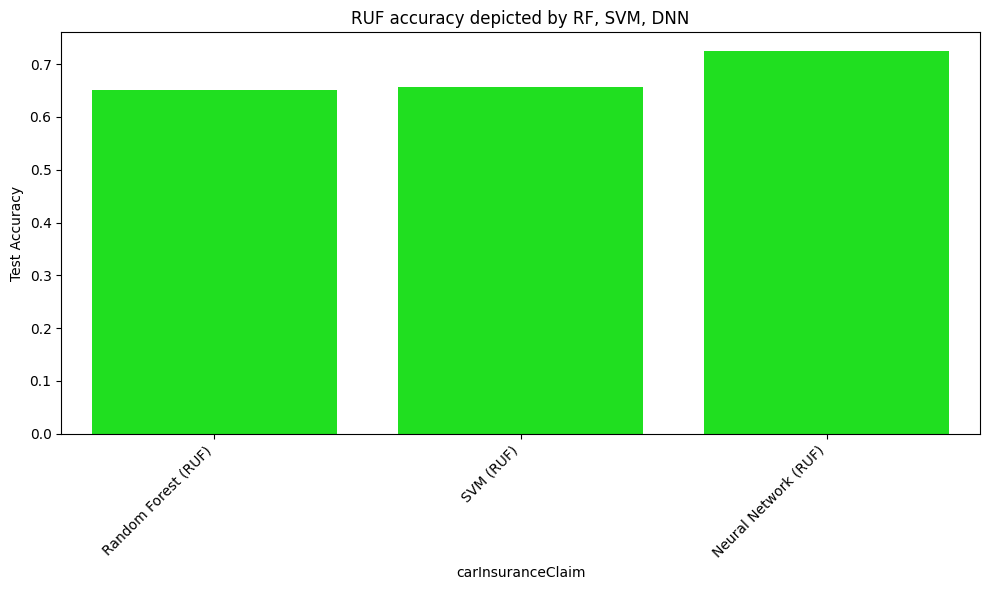

time: 318 ms (started: 2024-03-03 20:30:53 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (RUF)': accuracy_rf_ruf,
    'SVM (RUF)': accuracy_svm_ruf,
    'Neural Network (RUF)': accuracy_dnn_ruf,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color = 'lime')
plt.xticks(rotation=45, ha='right')
plt.title('RUF accuracy depicted by RF, SVM, DNN')
plt.xlabel('carInsuranceClaim')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

# GAMMA DISTRIBUTION SAMPLING (RF, SVM, DNN)

In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.utils import shuffle
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector

# Separate minority and majority classes
X_minority = X_scaled[y == 1]
X_majority = X_scaled[y == 0]

# Determine the size of the minority class
minority_size = len(X_minority)

# Define parameters for the Gamma distribution
shape = 2.0  # Shape parameter of the Gamma distribution
scale = 1.0  # Scale parameter of the Gamma distribution

# Generate random indices for sampling from the majority class
#gamma_indices = pd.random.gamma(shape, scale, size=minority_size).astype(int)

gamma_indices = np.round(np.random.gamma(shape, scale, size=minority_size)).astype(int)

# Sample from the majority class using the Gamma indices
#X_majority_sampled = X_majority.iloc[gamma_indices]
X_majority_sampled = X_majority[gamma_indices]

# Combine minority class samples with sampled majority class samples
X_resampled = np.concatenate([X_minority, X_majority_sampled])
y_resampled = np.concatenate([pd.Series(np.ones(minority_size)), pd.Series(np.zeros(minority_size))])

# Shuffle the resampled data
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

# Check the class distribution after resampling
print("Class distribution after Gamma distribution-based sampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Gamma distribution-based sampling:
0.0    2572
1.0    2572
dtype: int64
time: 14.4 ms (started: 2024-03-03 20:30:53 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_gamma = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_gamma)

pd.DataFrame(precision_recall)

Accuracy: 0.279045643153527


,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.278297,0.279046,0.639148,0.799361
recall,0.001437,1.000000,0.279046,0.500718,0.279046
f1-score,0.002869,0.435418,0.279046,0.219144,0.123122
support,696.000000,268.000000,0.279046,964.000000,964.000000


time: 414 ms (started: 2024-03-03 20:30:53 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = LinearSVC(random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_gamma = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_gamma)
print("\nClassification Report:\n", report)

Accuracy: 0.45020746887966806

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.31      0.45       696
           1       0.31      0.81      0.45       268

    accuracy                           0.45       964
   macro avg       0.56      0.56      0.45       964
weighted avg       0.67      0.45      0.45       964

time: 495 ms (started: 2024-03-03 20:30:53 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:

#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(25,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_gamma = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/10
129/129 [==============================] - 1s 4ms/step - loss: 0.2391 - accuracy: 0.9295 - val_loss: 1.7859 - val_accuracy: 0.5227
Epoch 2/10
129/129 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.9806 - val_loss: 2.7885 - val_accuracy: 0.5114
Epoch 3/10
129/129 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9898 - val_loss: 3.6385 - val_accuracy: 0.5152
Epoch 4/10
129/129 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9934 - val_loss: 4.1604 - val_accuracy: 0.5114
Epoch 5/10
129/129 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9951 - val_loss: 4.5760 - val_accuracy: 0.5095
Epoch 6/10
129/129 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 0.9973 - val_loss: 5.0721 - val_accuracy: 0.5095
Epoch 7/10
129/129 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.9976 - val_loss: 5.4416 - val_accuracy: 0.5095
Epoch 

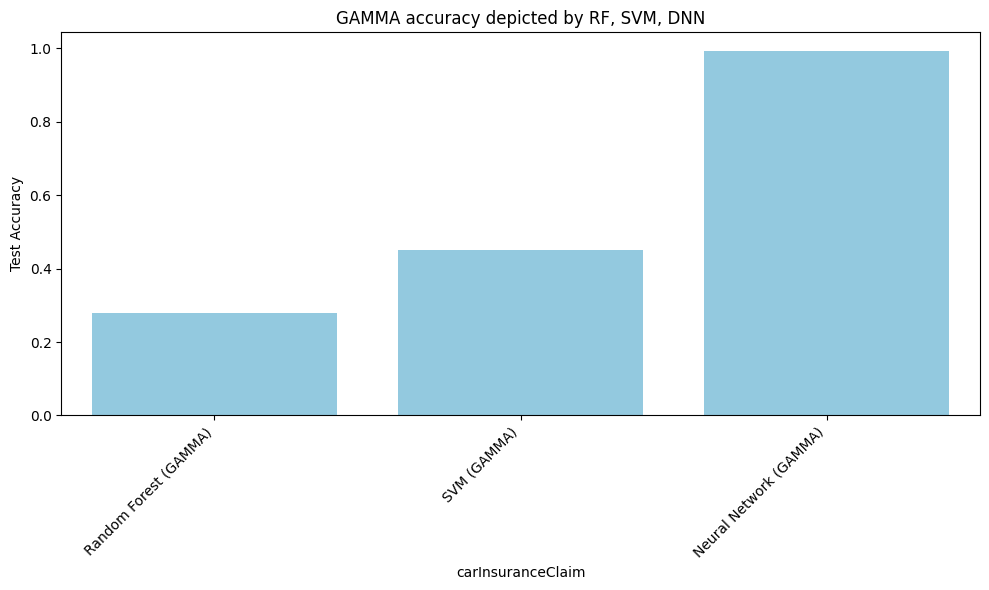

time: 284 ms (started: 2024-03-03 20:31:00 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (GAMMA)': accuracy_rf_gamma,
    'SVM (GAMMA)': accuracy_svm_gamma,
    'Neural Network (GAMMA)': accuracy_dnn_gamma,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color = 'skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('GAMMA accuracy depicted by RF, SVM, DNN')
plt.xlabel('carInsuranceClaim')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

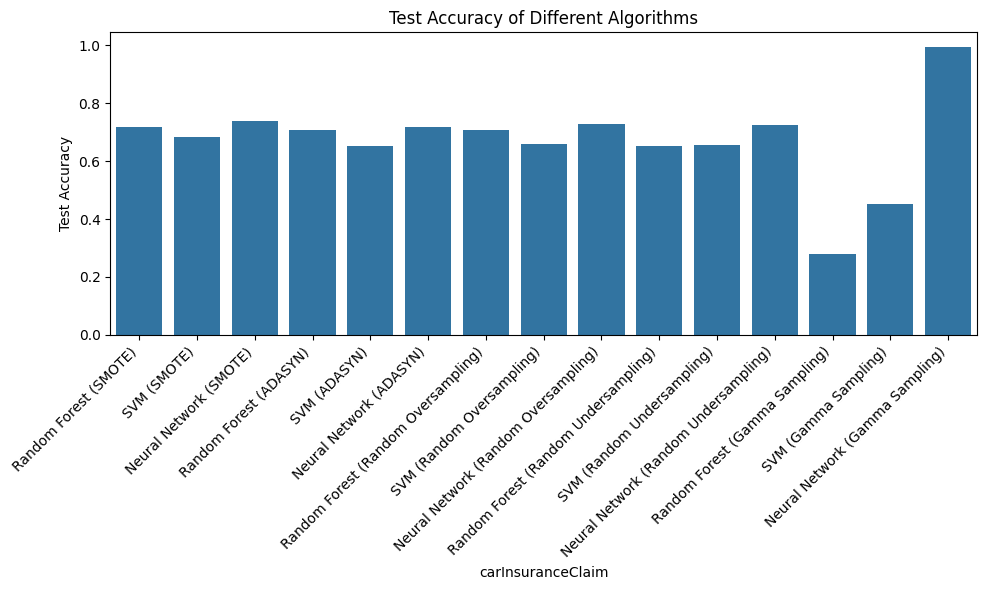

time: 424 ms (started: 2024-03-03 20:31:01 +00:00)


In [ ]:
# Store the test accuracies for each algorithm
# Adjusted dictionary to match your variables
test_accuracies = {
    'Random Forest (SMOTE)': accuracy_rf,
    'SVM (SMOTE)': accuracy_svm,
    'Neural Network (SMOTE)': accuracy_dnn,
    'Random Forest (ADASYN)': accuracy_rf_adasyn,
    'SVM (ADASYN)': accuracy_svm_adasyn,
    'Neural Network (ADASYN)': accuracy_dnn_adasyn,
    'Random Forest (Random Oversampling)': accuracy_rf_rof,
    'SVM (Random Oversampling)': accuracy_svm_rof,
    'Neural Network (Random Oversampling)': accuracy_dnn_rof,
    'Random Forest (Random Undersampling)': accuracy_rf_ruf,
    'SVM (Random Undersampling)': accuracy_svm_ruf,
    'Neural Network (Random Undersampling)': accuracy_dnn_ruf,
    'Random Forest (Gamma Sampling)': accuracy_rf_gamma,
    'SVM (Gamma Sampling)': accuracy_svm_gamma,
    'Neural Network (Gamma Sampling)': accuracy_dnn_gamma,
}


# Plotting the test accuracy for each algorithm
plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()))
plt.xticks(rotation=45, ha='right')
plt.title('Test Accuracy of Different Algorithms')
plt.xlabel('carInsuranceClaim')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

#**END OF ANALYSIS**